In [ ]:
"""

Program Name    : hw4_ba.py
Author          : Bima Aristo
Date            : 2024-10-18
Description     : CIFAR-10 Image Classification using Pytorch Framework. This code has been adapted form the official PyTorch tutorial: 
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html. Additional print statements and modifications have been made for educational purposes.

"""

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import time

print("BA put every library & module in the first place")

BA put every library & module in the first place


In [23]:
# Transform
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),  # BA added: Data Augmentation
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 8

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                    download=True, transform=transform)
# Printing the number of samples

print(f"BA added: Total testing samples: {len(testset)}")
print(f"BA added: Total training samples: {len(trainset)}")

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
        'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# change the Batch Size to higher batch
print(f"BA changed batch_size to 8 and added data augmentation paramter")

Files already downloaded and verified
Files already downloaded and verified
BA added: Total testing samples: 10000
BA added: Total training samples: 50000
BA changed batch_size to 8 and added data augmentation paramter


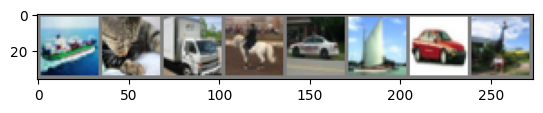

BA change the range to equal with the batch size; which is 8
ship  cat   truck horse car   ship  car   bird 


In [24]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(f'BA change the range to equal with the batch size; which is 8')
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [25]:
# Model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [26]:
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

print (f'BA change the optimizer to ADAM in the Hyperparameter and add a scheduler')
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

BA change the optimizer to ADAM in the Hyperparameter and add a scheduler


In [27]:
print (f'BA added: Initialize lists to store loss and accuracy')
loss_list = []
accuracy_list = []

for epoch in range(4):  # BA change the epoch to 4 to get more result

    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Calculate statistics for accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            loss_list.append(running_loss / 2000)  # BA added: store loss
            running_loss = 0.0

    # BA added: Calculate and store accuracy for the epoch
    epoch_accuracy = 100 * correct / total
    accuracy_list.append(epoch_accuracy)
    print(f'Epoch {epoch + 1}, Accuracy: {epoch_accuracy:.2f}%')

print('Finished Training')

BA added: Initialize lists to store loss and accuracy
[1,  2000] loss: 1.761
[1,  4000] loss: 1.487
[1,  6000] loss: 1.390
Epoch 1, Accuracy: 43.45%
[2,  2000] loss: 1.291
[2,  4000] loss: 1.244
[2,  6000] loss: 1.224
Epoch 2, Accuracy: 55.20%
[3,  2000] loss: 1.156
[3,  4000] loss: 1.153
[3,  6000] loss: 1.129
Epoch 3, Accuracy: 59.31%
[4,  2000] loss: 1.089
[4,  4000] loss: 1.076
[4,  6000] loss: 1.080
Epoch 4, Accuracy: 61.94%
Finished Training


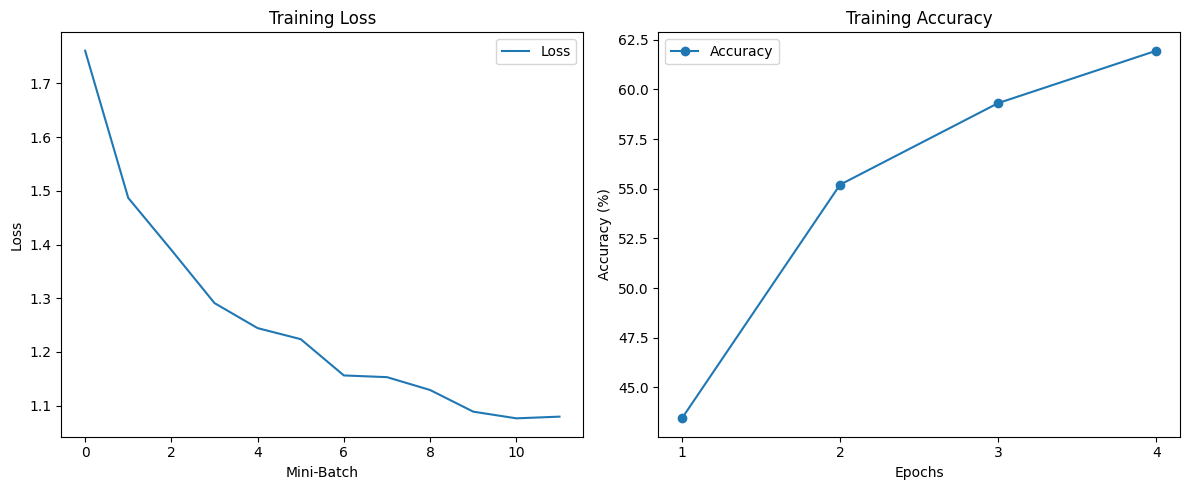

In [28]:
# BA added: Plotting loss and accuracy
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(loss_list, label='Loss')
plt.xlabel('Mini-Batch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy_list) + 1), accuracy_list, marker='o', label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.xticks(range(1, len(accuracy_list) + 1))
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

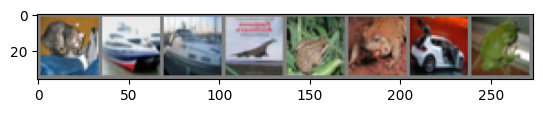

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog 


In [30]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [31]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [32]:
outputs = net(images)

In [33]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(8)))

Predicted:  cat   ship  ship  plane deer  frog  car   frog 


In [34]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 61 %


In [35]:

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 71.4 %
Accuracy for class: car   is 80.3 %
Accuracy for class: bird  is 40.0 %
Accuracy for class: cat   is 49.1 %
Accuracy for class: deer  is 45.6 %
Accuracy for class: dog   is 43.1 %
Accuracy for class: frog  is 73.1 %
Accuracy for class: horse is 67.3 %
Accuracy for class: ship  is 70.2 %
Accuracy for class: truck is 67.2 %
